In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot 
from scipy import stats

from IPython.display import display
pd.options.display.max_columns = None
#pd.options.display.max_columns = 100
#pd.options.display.max_rows = None --> shows all rows, your notebooks becomes slow 
pd.options.display.max_rows = 200

import warnings
warnings.filterwarnings('ignore')

import os
print (os.getcwd())
#print (os.listdir())

/Users/rajkiran/Desktop/MACHINE LEARNING Praveen/Notebooks


In [2]:
house_df = pd.read_csv("/Users/rajkiran/Desktop/MACHINE LEARNING Praveen/Notebooks/housing_price.csv")
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [3]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
print("*"*100)

****************************************************************************************************


# 1. Which Type of MSSubClass houses are Costlier...? 🧐

In [6]:
print("*"*100)

****************************************************************************************************


In [7]:
house_df.loc[house_df['MSSubClass']][['MSSubClass','SalePrice']]  #.describe()

,MSSubClass,SalePrice
60,20,158000
20,60,325300
60,20,158000
70,20,244000
60,20,158000
...,...,...
60,20,158000
20,60,325300
70,20,244000
20,60,325300


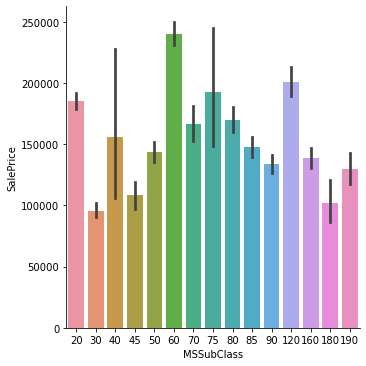

In [8]:
sns.catplot(x='MSSubClass',y='SalePrice',data=house_df,kind='bar',height=5)

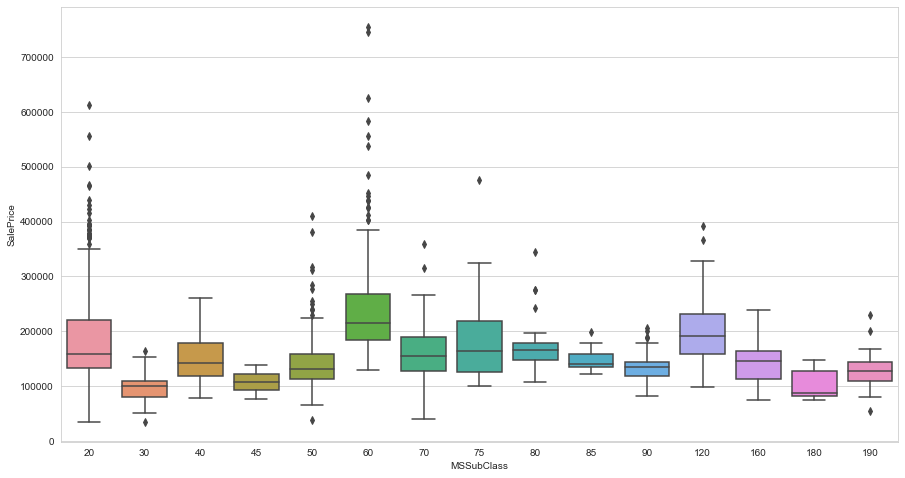

In [9]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = house_df);

## From the above 2 plots, we can Infer that, 60 ( 2-STORY 1946 & NEWER) Type Houses are costlier...

In [10]:
print("*"*100)

****************************************************************************************************


# 2. How Many houses show minimum garage area where max no of cars would fit...?

In [11]:
print("*"*100)

****************************************************************************************************


In [12]:
house_df.loc[house_df['GarageCars']==4][['Id','GarageArea','GarageCars']]
#house_df.loc[house_df['GarageArea']<864].loc

,Id,GarageArea,GarageCars
420,421,784,4
747,748,864,4
1190,1191,1356,4
1340,1341,480,4
1350,1351,968,4


In [13]:
#house_df.loc[house_df['GarageArea']].loc[house_df['GarageCars']==4][['GarageArea','GarageCars']]

In [14]:
print("*"*100)

****************************************************************************************************


# 3. Which Type of MSSubClass houses have been sold Higher in number between 1950 to till date...?

In [15]:
print("*"*100)

****************************************************************************************************


### Counting no of houses Sold Each Year : 

In [16]:
count = 0
for each in house_df['YrSold']:
    if each == 2006:                    ### Changing value always
        count=count+1
        print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [17]:
house_df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [18]:
314+329+304+338+175     ### Cross Check...

1460

In [19]:
b=house_df.loc[house_df['MSSubClass']].loc[house_df['YrSold']==2006][['MSSubClass','YrSold']]
b

,MSSubClass,YrSold
60,20,2006
20,60,2006
60,20,2006
60,20,2006
20,60,2006
...,...,...
20,60,2006
60,20,2006
20,60,2006
20,60,2006


In [20]:
c=house_df.loc[house_df['MSSubClass']].loc[house_df['YrSold']==2007][['MSSubClass','YrSold']]
c.shape

(244, 2)

In [21]:
d=house_df.loc[house_df['MSSubClass']].loc[house_df['YrSold']==2008][['MSSubClass','YrSold']]
d.shape

(132, 2)

In [22]:
a=house_df.loc[house_df['MSSubClass']].loc[house_df['YrSold']==2009][['MSSubClass','YrSold']]
a['MSSubClass'].shape

(74,)

In [23]:
e=house_df.loc[house_df['MSSubClass']].loc[house_df['YrSold']==2010][['MSSubClass','YrSold']]
e['MSSubClass'].shape

(12,)

In [24]:
house_df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

### How many above values are in MS SUBCLASS

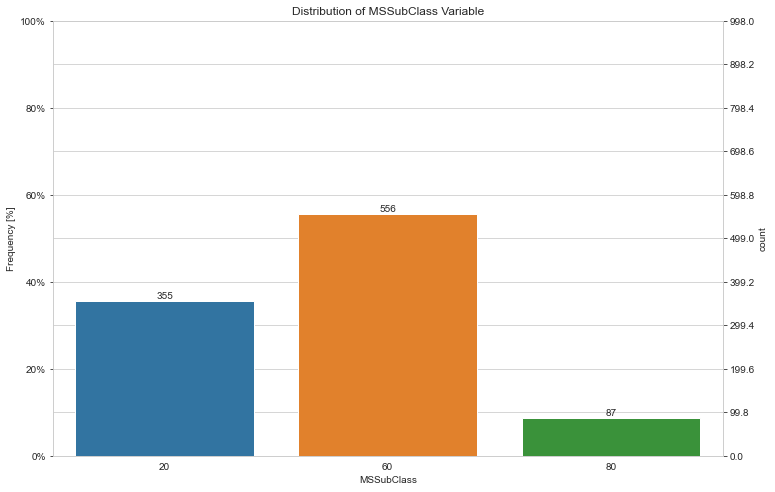

In [25]:
import matplotlib.ticker as ticker 
plt.figure(figsize=(12,8))
ax = sns.countplot(b['MSSubClass']) 
ncount = len(b['MSSubClass']) 
plt.title('Distribution of MSSubClass Variable')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0] 
    y=p.get_bbox().get_points()[1,1] 
    #ax.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text
    ax.annotate('{}'.format(int(y)),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text


    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
# And use a MultipleLocator to ensure a tick spacing of 10
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
fmt = '%.0f%%'
yticks = ticker.FormatStrFormatter( fmt ) 
ax2.yaxis.set_major_formatter( yticks )
# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
#plt.savefig('MSZoning_Variable.pdf')

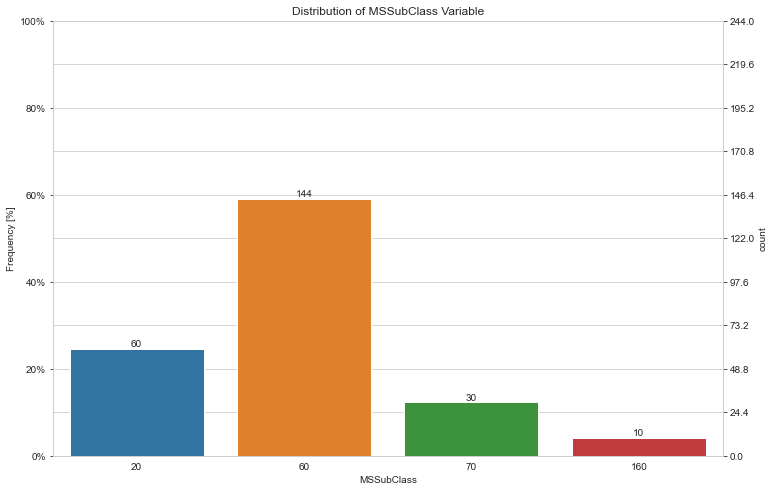

In [26]:
import matplotlib.ticker as ticker 
plt.figure(figsize=(12,8))
ax = sns.countplot(c['MSSubClass']) 
ncount = len(c['MSSubClass']) 
plt.title('Distribution of MSSubClass Variable')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0] 
    y=p.get_bbox().get_points()[1,1] 
    #ax.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text
    ax.annotate('{}'.format(int(y)),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text


    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
# And use a MultipleLocator to ensure a tick spacing of 10
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
fmt = '%.0f%%'
yticks = ticker.FormatStrFormatter( fmt ) 
ax2.yaxis.set_major_formatter( yticks )
# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
#plt.savefig('MSZoning_Variable.pdf')

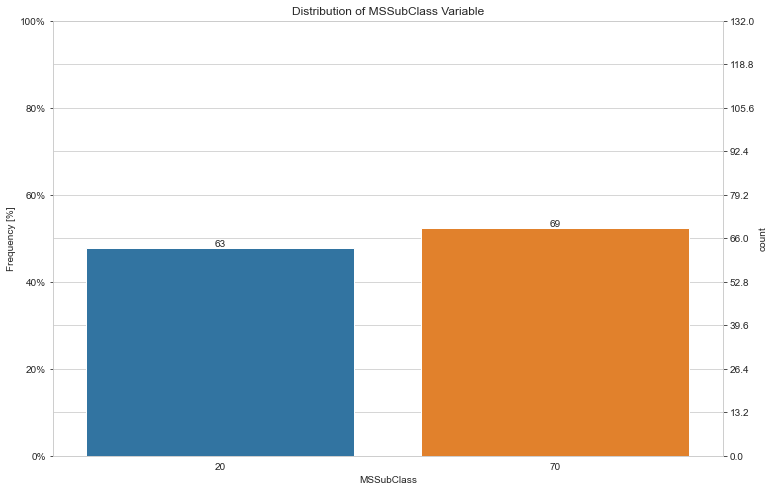

In [27]:
import matplotlib.ticker as ticker 
plt.figure(figsize=(12,8))
ax = sns.countplot(d['MSSubClass']) 
ncount = len(d['MSSubClass']) 
plt.title('Distribution of MSSubClass Variable')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0] 
    y=p.get_bbox().get_points()[1,1] 
    #ax.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text
    ax.annotate('{}'.format(int(y)),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text


    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
# And use a MultipleLocator to ensure a tick spacing of 10
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
fmt = '%.0f%%'
yticks = ticker.FormatStrFormatter( fmt ) 
ax2.yaxis.set_major_formatter( yticks )
# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
#plt.savefig('MSZoning_Variable.pdf')

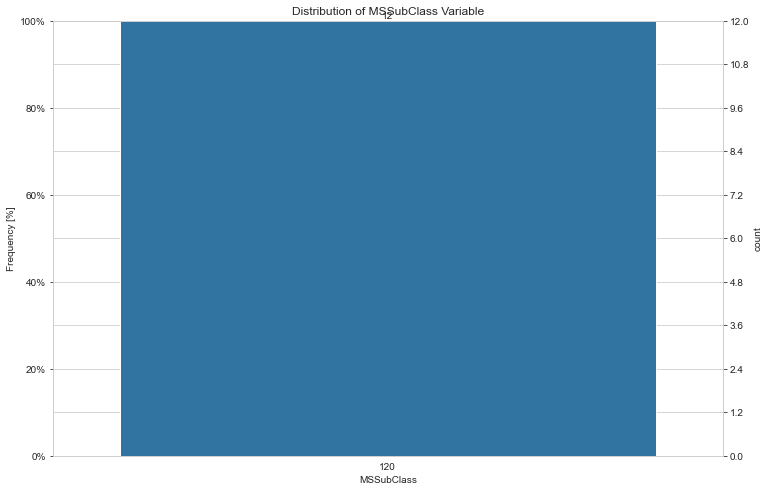

In [28]:
import matplotlib.ticker as ticker 
plt.figure(figsize=(12,8))
ax = sns.countplot(e['MSSubClass']) 
ncount = len(e['MSSubClass']) 
plt.title('Distribution of MSSubClass Variable')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0] 
    y=p.get_bbox().get_points()[1,1] 
    #ax.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text
    ax.annotate('{}'.format(int(y)),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text


    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
# And use a MultipleLocator to ensure a tick spacing of 10
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
fmt = '%.0f%%'
yticks = ticker.FormatStrFormatter( fmt ) 
ax2.yaxis.set_major_formatter( yticks )
# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
#plt.savefig('MSZoning_Variable.pdf')

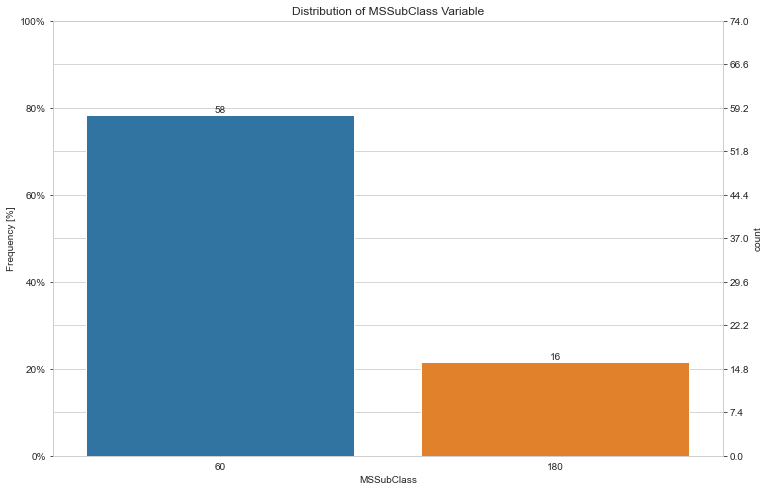

In [29]:
import matplotlib.ticker as ticker 
plt.figure(figsize=(12,8))
ax = sns.countplot(a['MSSubClass']) 
ncount = len(a['MSSubClass']) 
plt.title('Distribution of MSSubClass Variable')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0] 
    y=p.get_bbox().get_points()[1,1] 
    #ax.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text
    ax.annotate('{}'.format(int(y)),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text


    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
# And use a MultipleLocator to ensure a tick spacing of 10
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
fmt = '%.0f%%'
yticks = ticker.FormatStrFormatter( fmt ) 
ax2.yaxis.set_major_formatter( yticks )
# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
#plt.savefig('MSZoning_Variable.pdf')

### house type 60 : 2-STORY 1946 & NEWER  Sold higher in MSSubClass from 1950 to till Date

In [30]:
print("*"*100)

****************************************************************************************************


# 4.  Do the Houses that Accommodate more cars are Costlier..?

In [31]:
print("*"*100)

****************************************************************************************************


In [32]:
house_df.loc[house_df['GarageCars']==3][['SalePrice']].head()

,SalePrice
3,140000
4,250000
11,345000
13,279500
20,325300


In [33]:
house_df.loc[house_df['GarageCars']==4][['SalePrice']]

,SalePrice
420,206300
747,265979
1190,168000
1340,123000
1350,200000


In [34]:
house_df['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

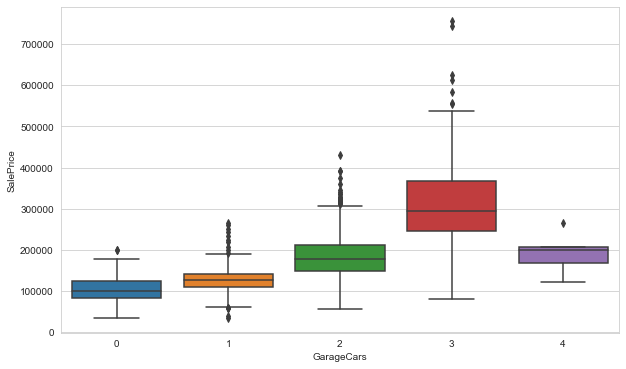

In [35]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = house_df);

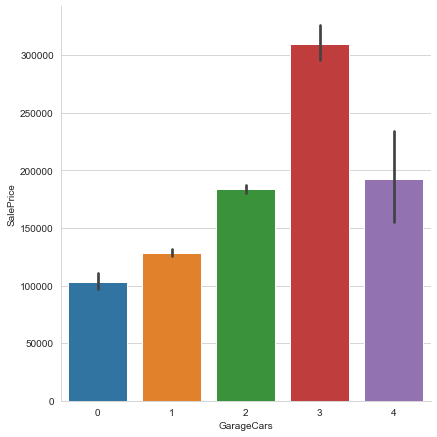

In [36]:
sns.catplot(x='GarageCars',y='SalePrice',data=house_df,kind='bar',height=6)

## Yes, the houses That Accommodate More Cars are costlier except 4 Cars Garage... May be other Factors Might be effecting 4 Cars Garage Price

In [37]:
print("*"*110)

**************************************************************************************************************


# 5. Which kind of Neighborhood Houses are Costlier...?

In [38]:
print("*"*110)

**************************************************************************************************************


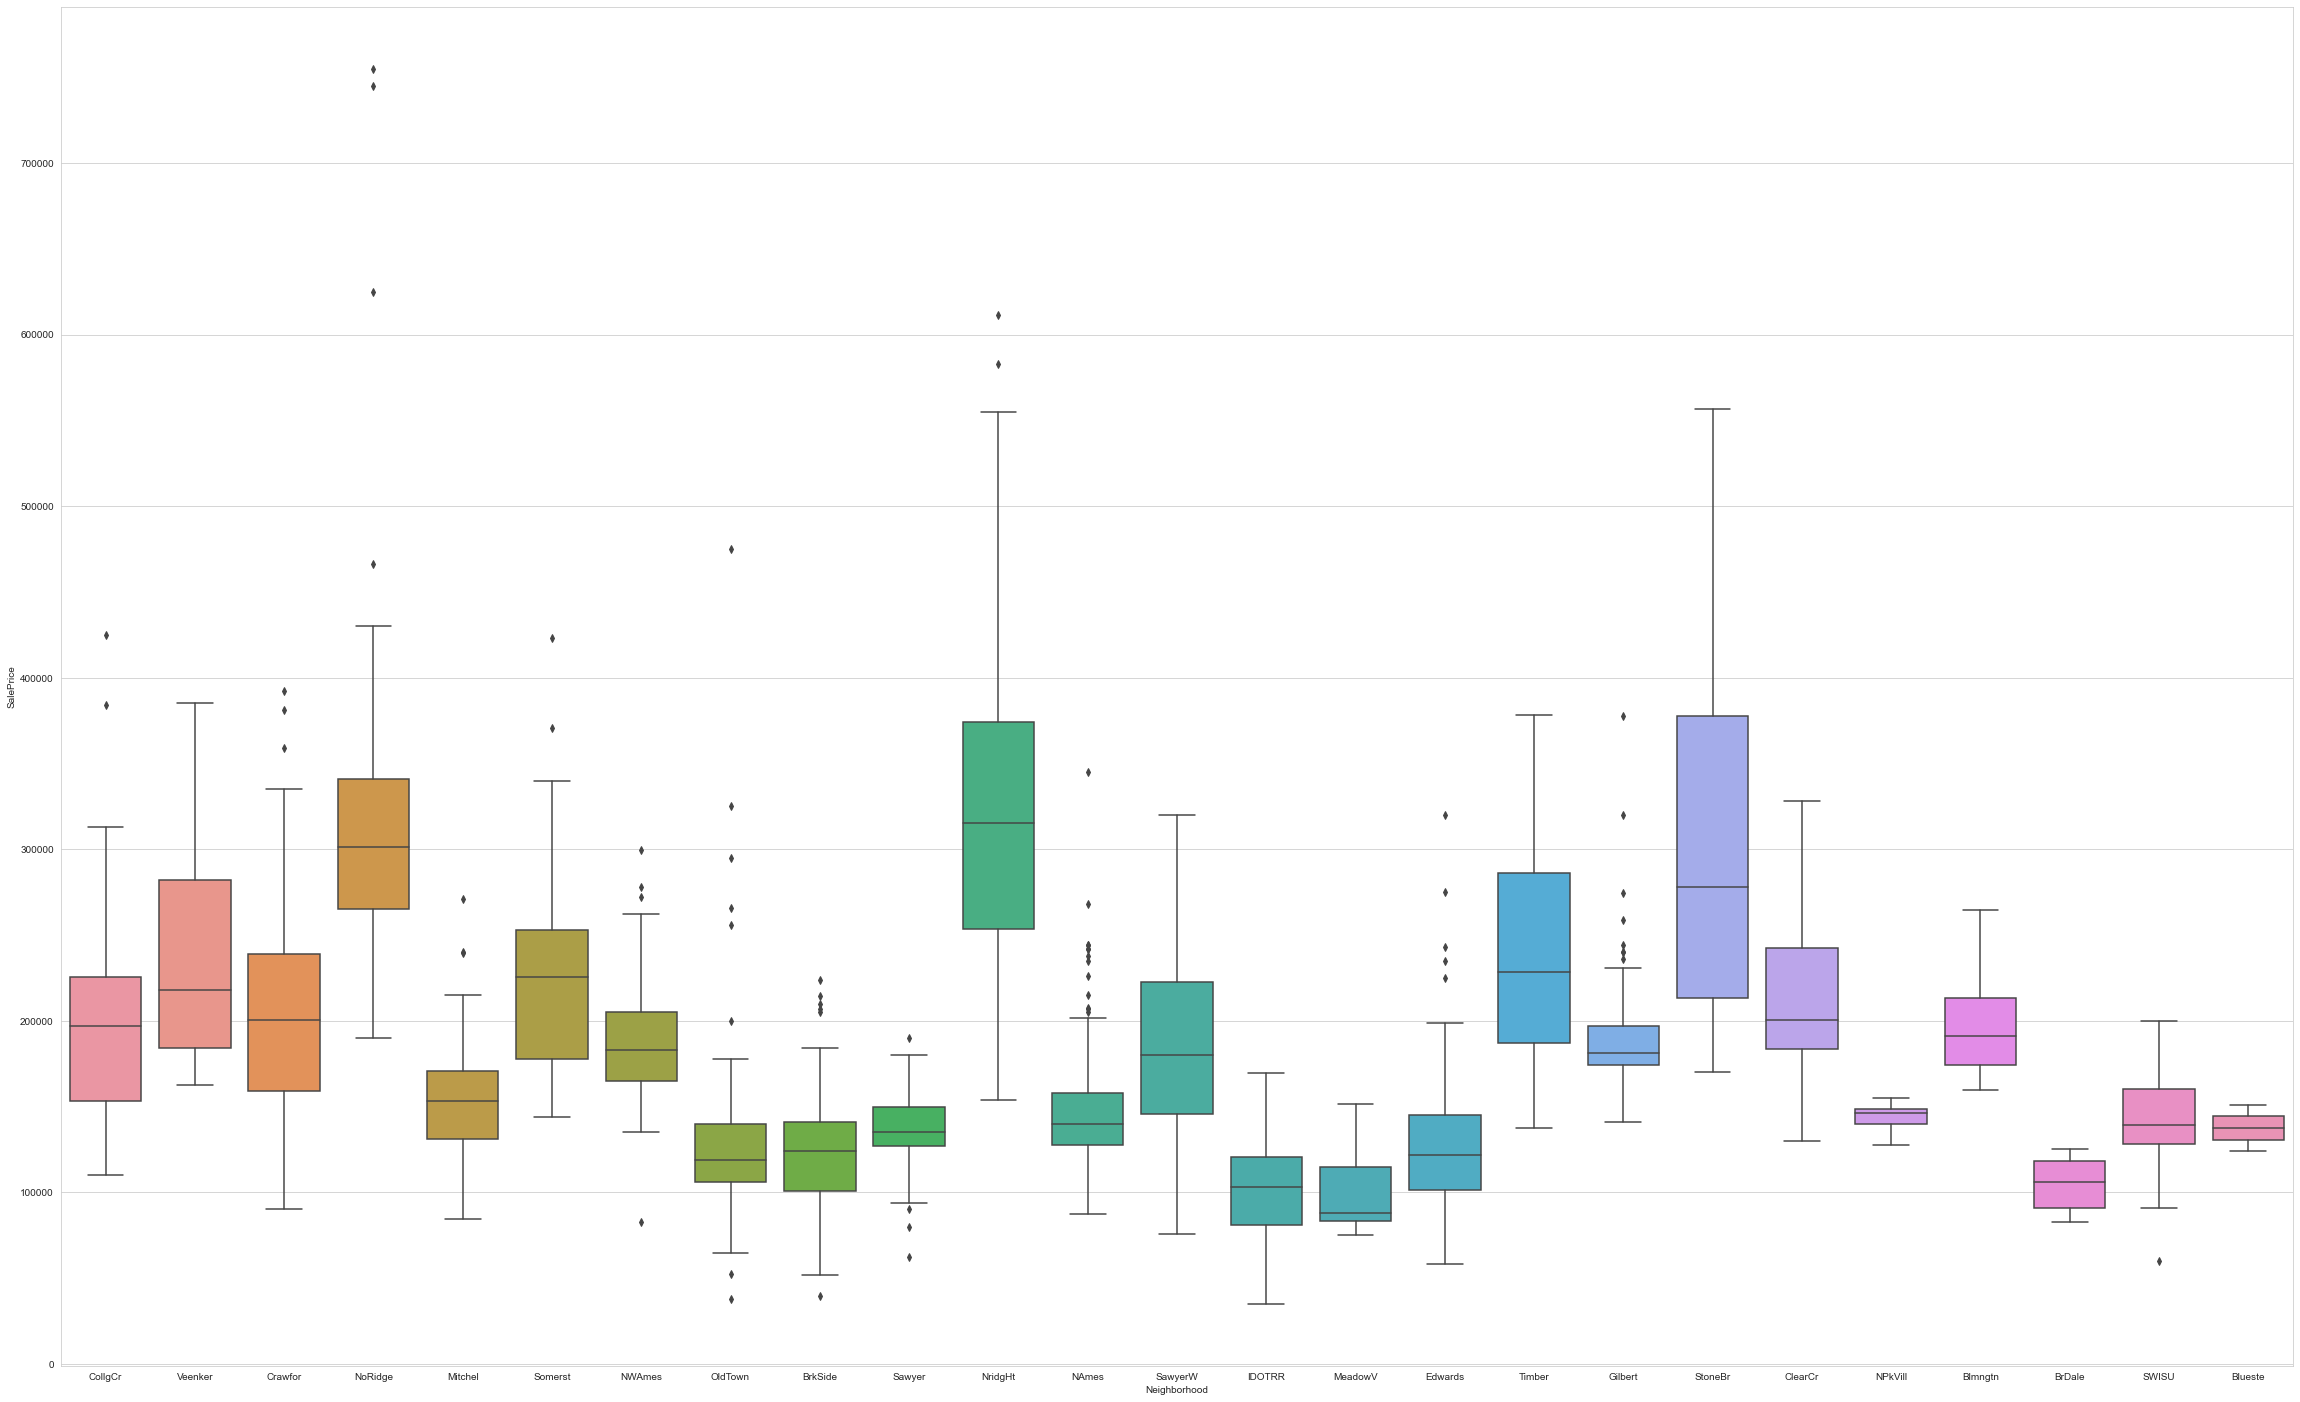

In [66]:
plt.figure(figsize=(40,25))
sns.set_style("whitegrid")
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = house_df);
#plt.savefig("Neighbourhood Houses saleprice bar.pdf")

###  1.----------------------------------> NridgHt (Northridge Heights) neighborhood houses, 
###   followed by ---------------------> NoRidge (Northridge) houses
###   followed by ---------------------> StoneBr ( Stone Brook ) Houses

In [40]:
print("*"*100)

****************************************************************************************************


# 6. OverallQual wise,List down the mean and Median Sale Prices

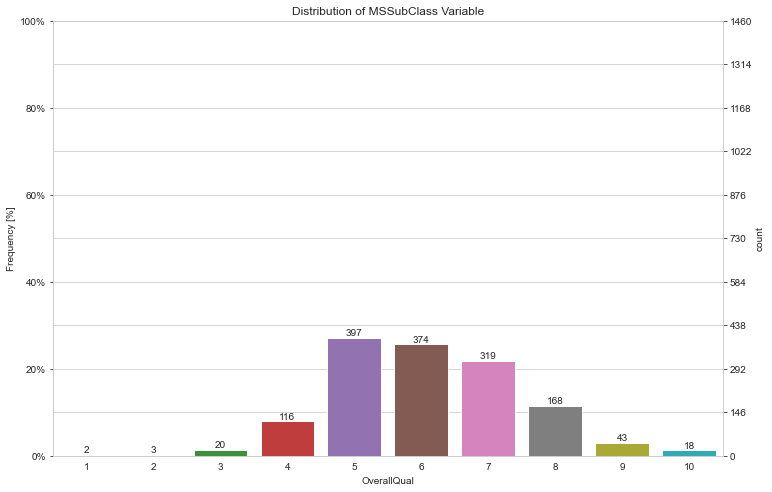

In [41]:
import matplotlib.ticker as ticker 
plt.figure(figsize=(12,8))
ax = sns.countplot(house_df['OverallQual']) 
ncount = len(house_df['OverallQual']) 
plt.title('Distribution of MSSubClass Variable')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0] 
    y=p.get_bbox().get_points()[1,1] 
    #ax.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text
    ax.annotate('{}'.format(int(y)),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text


    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
# And use a MultipleLocator to ensure a tick spacing of 10
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
fmt = '%.0f%%'
yticks = ticker.FormatStrFormatter( fmt ) 
ax2.yaxis.set_major_formatter( yticks )
# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
#plt.savefig('MSZoning_Variable.pdf')

## Print all houses with sale price,where Overallqual = 5

In [42]:
house_df.loc[house_df['OverallQual']==10][['SalePrice']].describe()

,SalePrice
count,18.000000
mean,438588.388889
std,159785.491058
min,160000.000000
25%,349375.000000
50%,432390.000000
75%,472875.000000
max,755000.000000


In [43]:
over_all_qual_csv = pd.read_csv("/Users/rajkiran/Desktop/\
MACHINE LEARNING Praveen/Notebooks/Overall Quality Wise sale prices.csv")
over_all_qual_csv

,Quality,Min,Max,Mean,Median
0,1,39300,61000,50150,50150
1,2,35311,60000,51770,60000
2,3,37900,139600,87473,86250
3,4,34900,256000,108420,108000
4,5,55993,228950,133523,133000
5,6,76000,277000,161603,160000
6,7,82500,383970,207716,200141
7,8,122000,538000,274735,269750
8,9,239000,611657,367513,345000
9,10,160000,755000,438588,432390


In [44]:
print("*"*110)

**************************************************************************************************************


# 7. DO oldest houses accommodate More Cars or new houses..?

In [45]:
house_df['YearBuilt'].unique().shape

(112,)

In [46]:
house_df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905])

In [47]:
house_df['YearBuilt'][0]

2003

In [48]:
mini = house_df['YearBuilt'][0]
for each in house_df['YearBuilt']:
    if (each < mini):
        mini = each
        print(mini)

1976
1915
1910
1885
1880
1875
1872


In [49]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [50]:
house_df['GarageCars']

0       2
1       2
2       2
3       3
4       3
       ..
1455    2
1456    2
1457    1
1458    1
1459    1
Name: GarageCars, Length: 1460, dtype: int64

##  18th and 19th cent = Old ,  >1999 to till Date : new

In [51]:
old_houses = house_df.loc[house_df['YearBuilt'].between(1800,1999)]

In [52]:
old_houses.shape

(1072, 81)

In [53]:
new_houses = house_df.loc[house_df['YearBuilt']>1999]

In [54]:
new_houses.shape

(388, 81)

In [55]:
#house_df.loc[old_houses][['YearBuilt','SalePrice']]

In [56]:
#sns.catplot(x=house_df[old_houses],y='SalePrice',data=house_df,kind='box')

# 8. Do the TotRmsAbvGrd impacts SalePrice..?

In [57]:
house_df[['TotRmsAbvGrd','SalePrice']].corr()

,TotRmsAbvGrd,SalePrice
TotRmsAbvGrd,1.000000,0.533723
SalePrice,0.533723,1.000000


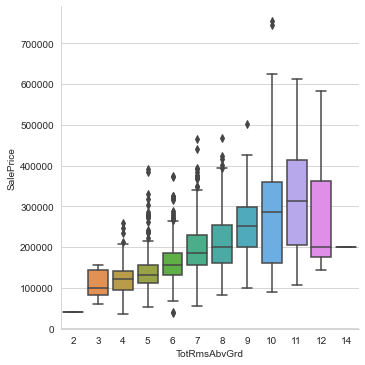

In [58]:
sns.catplot(x='TotRmsAbvGrd',y='SalePrice',data=house_df,kind='box')

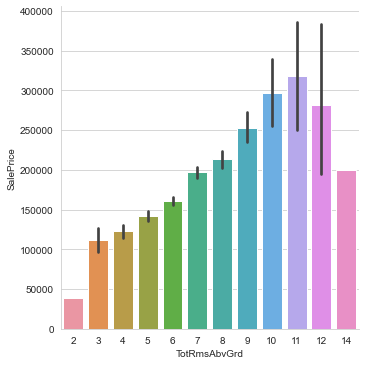

In [59]:
sns.catplot(x='TotRmsAbvGrd',y='SalePrice',data=house_df,kind='bar')

###  Yes, The Total Rooms above Grade impacts the Sale Price.. 
### The More the TOT_RMS_ABV_GRADE, the More the Sale Price is

In [60]:
print(house_df.shape)

(1460, 81)


In [61]:
X = house_df.drop(columns = ['SalePrice'])
X.shape

(1460, 80)

In [62]:
X.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359


In [63]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",props=[("font-size","7pt")]),
           dict(selector="td",props=[('padding',"0em 0em")]),
           dict(selector="th:hover",props=[("font-size","12pt")]),
           dict(selector="tr:hover td:hover",props=[('max-width','200px'),('font-size','12pt')])
           ]
X.corr().style.background_gradient(cmap,axis=1)\
    .set_properties(**{'max-width':'80px','font-size':'10pt'})\
    .set_caption("Hover to Magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.00,0.01,-0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,-0.01,-0.01,-0.02,0.01,0.01,-0.04,0.01,0.00,-0.02,0.01,0.01,0.04,0.00,0.03,-0.02,0.00,0.02,0.02,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00
MSSubClass,0.01,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.09,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02
LotFrontage,-0.01,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.04,0.40,0.10,-0.01,0.20,0.05,0.26,-0.01,0.35,0.27,0.07,0.29,0.34,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01
LotArea,-0.03,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,-0.02,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01
OverallQual,-0.03,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,0.31,0.54,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,-0.18,0.43,0.40,0.55,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03
OverallCond,0.01,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.32,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04
YearBuilt,-0.01,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.83,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01
YearRemodAdd,-0.02,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.64,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04
MasVnrArea,-0.05,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.09,0.03,0.28,0.20,0.10,-0.04,0.28,0.25,0.25,0.36,0.37,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01
BsmtFinSF1,-0.01,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.15,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01


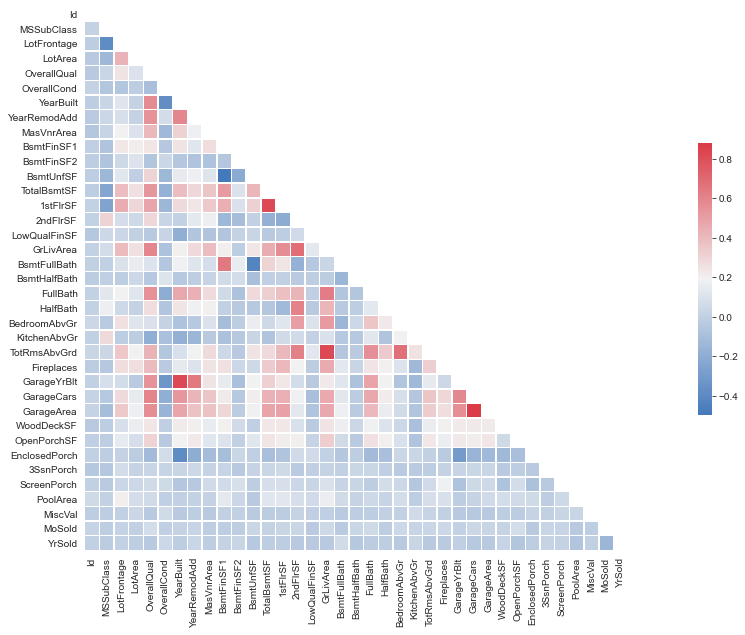

In [64]:
def CorrMtx(df, dropDuplicates = True):
    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation 
    # of a correlation matrix, just uncomment the line below:
    df = df.corr()
    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
    # Set background color / chart style
    sns.set_style(style = 'white') 
    
    # Set up matplotlib figure
    f, ax = plt.subplots(figsize=(25, 10))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap,
        square=True,
        linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap,
        square=True,
        linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        
        
CorrMtx(X, dropDuplicates = True) #Maket it False and see what you Notice

##  1. (Garage Area, Garage Cars)  ---------------- 2. (GarageYrBuilt,YearBuilt)
##  3. (TotalRmsAbvGrd , GrLivArea)  -------------- 4. ( 1st Floor Sf, TotalBsmtSF)
##  5. (Year Built,YearRemodAdd)  ----------------- 6. (GrLivArea, 2nd FloorSf)

In [65]:
house_df.loc[house_df['GarageArea']< 880].loc[house_df['GarageCars'] == 4]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,421,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,SFoyer,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,200.0,TA,Gd,PConc,Gd,Gd,Gd,GLQ,1309,Unf,0,35,1344,GasA,Ex,Y,SBrkr,1344,0,0,1344,2,0,2,0,2,2,TA,8,Typ,0,NaN,Attchd,1997.0,Fin,4,784,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0,Unf,0,1240,1240,GasW,TA,N,SBrkr,1320,1320,0,2640,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950.0,Unf,4,864,TA,TA,N,181,0,386,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1340,1341,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,858,858,GasA,TA,Y,SBrkr,872,0,0,872,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1974.0,Unf,4,480,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
